Yelp Review Data Set from Kaggle
(https://www.kaggle.com/c/yelp-recsys-2013).

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp=pd.read_csv('/content/yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  10923 non-null  object 
 1   date         10923 non-null  object 
 2   review_id    10923 non-null  object 
 3   stars        10923 non-null  int64  
 4   text         10923 non-null  object 
 5   type         10923 non-null  object 
 6   user_id      10922 non-null  object 
 7   cool         10922 non-null  float64
 8   useful       10922 non-null  float64
 9   funny        10922 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 853.5+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10923.000000,10922.000000,10922.000000,10922.000000
mean,3.779822,0.881707,1.416957,0.705274
std,1.214930,2.097547,2.360225,1.980268
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text_length']=yelp['text'].apply(len)

In [7]:
sns.set_style('white')

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

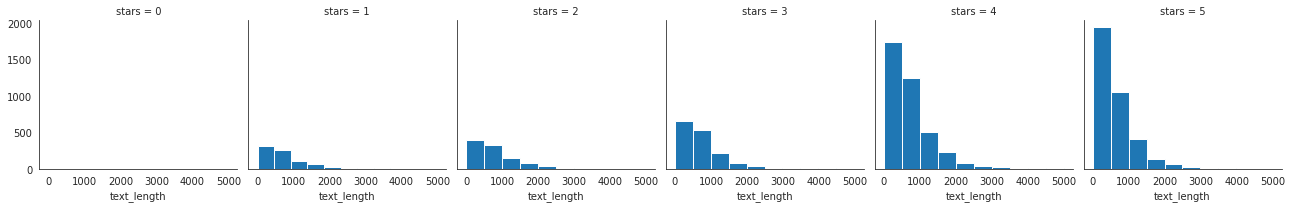

In [8]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length')

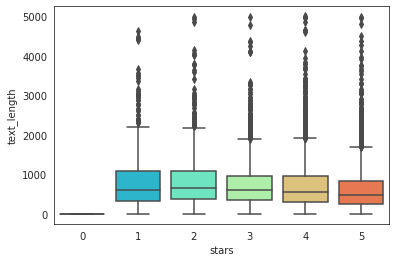

In [9]:
sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')

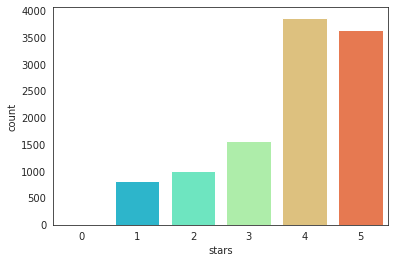

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [11]:
stars=yelp.groupby(by='stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
0,NaN,NaN,NaN,1.000000
1,0.582927,1.609756,1.057317,822.774390
2,0.723214,1.565476,0.870040,840.112103
3,0.796696,1.318933,0.711563,756.366582
4,0.947300,1.394988,0.667786,716.927409
5,0.959715,1.398191,0.617703,624.955056


In [12]:
yelp.corr()

,stars,cool,useful,funny,text_length
stars,1.000000,0.052947,-0.021975,-0.058164,-0.112248
cool,0.052947,1.000000,0.889087,0.777473,0.238329
useful,-0.021975,0.889087,1.000000,0.734535,0.291989
funny,-0.058164,0.777473,0.734535,1.000000,0.241330
text_length,-0.112248,0.238329,0.291989,0.241330,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

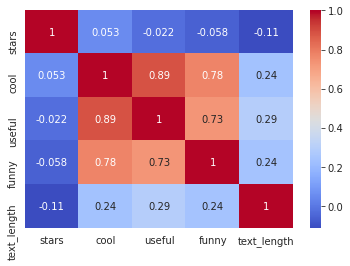

In [17]:
sns.heatmap(yelp.corr(),cmap='coolwarm',annot=True)

In [18]:
yelp_class = yelp[(yelp.stars!=0)]

In [19]:
X=yelp_class['text']
y=yelp_class['stars']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
predictions = nb.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 73  42  28  79  38]
 [ 16  37  47 171  28]
 [  2  16  67 347  31]
 [  7   7  29 874 264]
 [  7   1   9 434 623]]


              precision    recall  f1-score   support

           1       0.70      0.28      0.40       260
           2       0.36      0.12      0.18       299
           3       0.37      0.14      0.21       463
           4       0.46      0.74      0.57      1181
           5       0.63      0.58      0.61      1074

    accuracy                           0.51      3277
   macro avg       0.50      0.37      0.39      3277
weighted avg       0.51      0.51      0.48      3277



# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [31]:
pipeline=Pipeline([
                   ('bow',CountVectorizer()),
                   ('tfdif',TfidfTransformer()),
                   ('classifier',MultinomialNB())
])

In [32]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfdif',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
predictions = pipeline.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0    0    0  220   40]
 [   0    0    0  286   13]
 [   0    0    0  450   13]
 [   0    0    0 1087   94]
 [   0    0    0  700  374]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       260
           2       0.00      0.00      0.00       299
           3       0.00      0.00      0.00       463
           4       0.40      0.92      0.55      1181
           5       0.70      0.35      0.47      1074

    accuracy                           0.45      3277
   macro avg       0.22      0.25      0.20      3277
weighted avg       0.37      0.45      0.35      3277



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
